
### **Apredisaje Supervisado**

### Omar Urena



####***Descripcion Dataset***

Las complicaciones en el parto son una de las principales causas de mortalidad perinatal. El cardiotocógrafo fetal (CTG) se puede utilizar como una herramienta de seguimiento durante el parto ya que puede permitir evaluar el estado de salud del bebé durante el nacimiento.

La cardiotocografía registra simultáneamente la frecuencia cardíaca fetal, los movimientos fetales y las contracciones uterinas. El registro permite al profesional sanitario valorar el latido cardíaco fetal durante la última etapa de la gestación y la respuesta del bebé a las contracciones durante todo el parto hasta el nacimiento.

En este sentido, se recogieron datos de 2.126 cardiotocogramas fetales (CTG) y se midieron las características de diagnóstico respectivas. Los CTG también fueron clasificados por tres obstetras expertos y se asignó una etiqueta de clasificación de consenso a cada uno de ellos. De esta manera las características de diagnóstico representan el conjunto de variables explicativas que va a permitir estimar el estado fetal (target) en normal o anormal.

## **CARGA DE DATOS**

In [ ]:
# Libreria Pandas para leer y explorar los datos
import pandas as pd
import numpy as np

# libreria para graficos
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Carga de Datos

df = pd.read_csv('/content/ASI_casoPractico.csv', sep = ';')

## **Analisis Exploratorio**

In [ ]:
#Explorar Dataset: visualizamos las primera filas del conjunto de datos para familiarizarnos con las informaciones almacenadas.
df.head()

,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,1,240,357,120,0,0,0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,1
1,2,5,632,132,4,0,4,17,2.1,0,...,68,198,6,1,141,136,140,12,0,0
2,3,177,779,133,2,0,5,16,2.1,0,...,68,198,5,1,141,135,138,13,0,0
3,4,411,1192,134,2,0,6,16,2.4,0,...,53,170,11,0,137,134,137,13,1,0
4,5,533,1147,132,4,0,5,16,2.4,0,...,53,170,9,0,137,136,138,11,1,0


In [ ]:
#Informaciones del dataset
#(Nombres de variables o columnas, cantidad de columnas (26), cantidad filas(2,126))
#(Tipo de datos (Entero & decimales (Variables cuantitativas discretas(24) y continúas(2))
#De primera manos visualizamos que no hay 2,126 Non-Null de 2,126 filas existentes.
print(df.info(),f'Dimesión del dataset (Rows/Col) {df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2126 non-null   int64  
 1   b         2126 non-null   int64  
 2   e         2126 non-null   int64  
 3   LBE       2126 non-null   int64  
 4   AC        2126 non-null   int64  
 5   FM        2126 non-null   int64  
 6   UC        2126 non-null   int64  
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  DL        2126 non-null   int64  
 12  DS        2126 non-null   int64  
 13  DP        2126 non-null   int64  
 14  DR        2126 non-null   int64  
 15  Width     2126 non-null   int64  
 16  Min       2126 non-null   int64  
 17  Max       2126 non-null   int64  
 18  Nmax      2126 non-null   int64  
 19  Nzeros    2126 non-null   int64  
 20  Mode      2126 non-null   int6

In [ ]:
#Eliminar columnas no necesarias
df = df.drop(["ID","b","e","DR"], axis = 1)
df.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,0


In [ ]:
#Principales estadisticas descriptivas del dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
UC,2126.0,3.659925,2.847094,0.0,1.0,3.0,5.0,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.0,49.0,61.0,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.7,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
MLTV,2126.0,8.187629,5.628247,0.0,4.6,7.4,10.8,50.7
DL,2126.0,1.570085,2.499229,0.0,0.0,0.0,3.0,16.0
DS,2126.0,0.003293,0.057300,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Revisar si existen missing values o valores perdidos
df.isnull().sum().to_frame("Missing")

,Missing
LBE,0
AC,0
FM,0
UC,0
ASTV,0
MSTV,0
ALTV,0
MLTV,0
DL,0
DS,0


Observamos que contamos con 2 variables cuantitativas continuas y las demas son son cuantitativas discretas 20 variables ya que 4 fueron eliminadas por no aportan valor para un total de 26 variables en el dataset.



In [ ]:
#@title
#Cuantitativas continuas

c = df.select_dtypes(include=['float64']).columns.to_list()
d = df.select_dtypes(include=['int64']).columns.to_list()

print(f'Variables Cuantitativas continuas(Float64) { c }')

print(f'Variables Cuantitativas Discretas (Int64) { d }')


Variables Cuantitativas continuas(Float64) ['MSTV', 'MLTV']
Variables Cuantitativas Discretas (Int64) ['LBE', 'AC', 'FM', 'UC', 'ASTV', 'ALTV', 'DL', 'DS', 'DP', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'Target']


Observamos que contamos con 1,655 pacientes o casos normales para un 78 % y 471 casos anormales para un 22%, la data esta desbalanceada respecto a la variable objetivo, por lo que seria recomedable utilizar la tenica de muestreo de validacion cruzada.

0    1655
1     471
Name: Target, dtype: int64


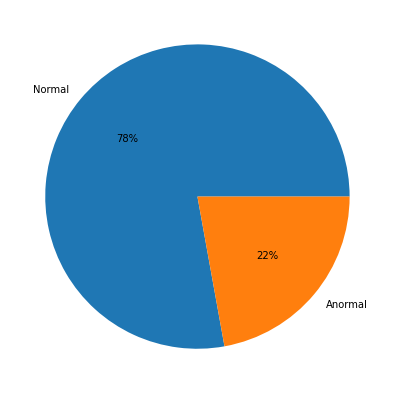

In [ ]:
#@title
#Distribucion o frecuencia de la variable repuesta

a, b = df['Target'].value_counts()
plt.figure(figsize = (15,10))
plt.subplot(121)
plt.pie([a, b], labels=["Normal", "Anormal"], autopct="%1.0f%%")
print(df["Target"].value_counts())

1. (FM) Observamos una media del 7.24 con una desviacion de 37.1 cuando su valor minimos es 0 y su maximo es 564, la mitad de sus datos estan entre 0 y 2 esto nos indica posibles outliers.

2. (ALTV) Observmos una media de 9.8 con una desviacion de 18.4 cuando su valor minimo es 0 y su maximo 91, la mitad de sus datos esta entre 0 y 11 esto nos indica posibles outliers.

3. (Median) Observamos una media de 138 con una desviacion de 17.5 cuando su minimo es 77 y su maximo es 186, la mitad de sus datos oscilan entre 129 y 148 con una mediana de 139 nos indica buena distribucion de los datos. ya que la media y la mediana son casi similar.

In [ ]:
#@title
df[['FM', 'ALTV' , 'Median']].describe().T

,count,mean,std,min,25%,50%,75%,max
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
Median,2126.0,138.090310,14.466589,77.0,129.0,139.0,148.0,186.0


### 4-***Obtenga el histograma para las variables: LBE, DS y Min.***

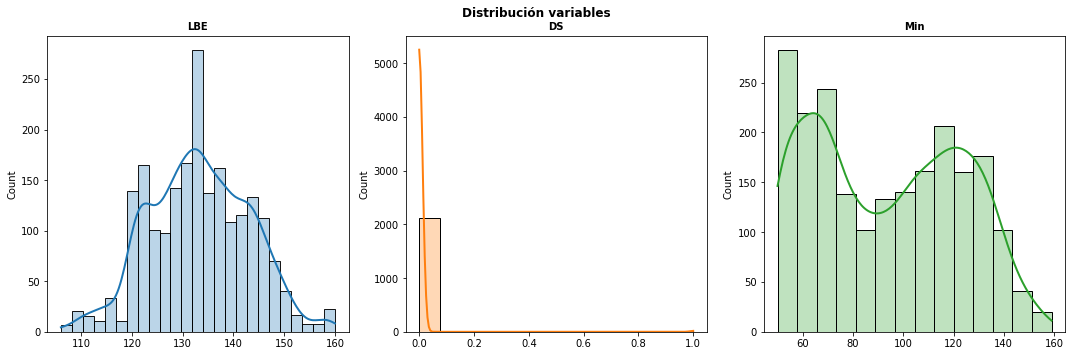

In [ ]:
#@title
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes = axes.flat
columnas= ['LBE', 'DS' , 'Min']

for i, colum in enumerate(columnas):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables', fontsize = 12, fontweight = "bold");

1. (AC) Observamos que la variable AC contiene outliers que van por encima de 11 cuando el 50% de sus datos se concentran entre 0 y 4 con una mediana 1.

2. (ASTV) Observamos que esta variable no contiene aoutliers y la mitad de sus datos se concentran entre 32 y 61 con una mediana 49 con una buena distribucion ya que su minimo se posiciona alrrededor de 11 y su maximo 89.

3. (Mean) Observamos que contienes outliers en ambos extremos sin emabrgo su distribucion es buena, solo se debe corregir estos valores extremos que afectan las mayorias de algoritmos.

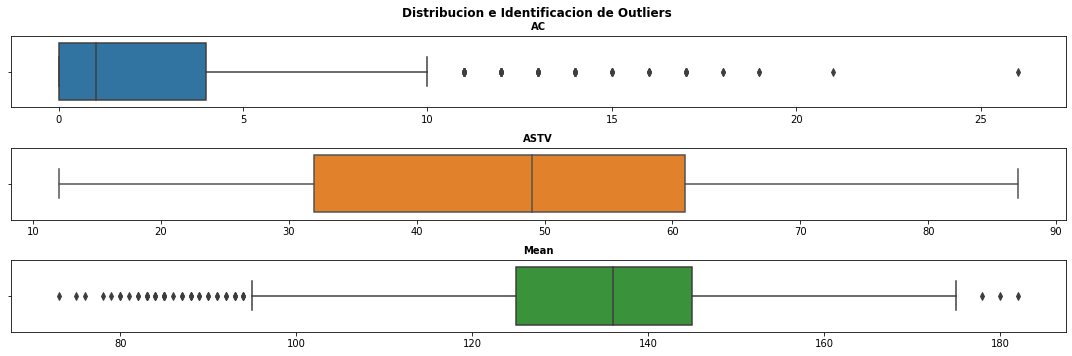

In [ ]:
#@title
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 5))
axes = axes.flat
columnas_ = ['AC', 'ASTV' , 'Mean']

for i, colum in enumerate(columnas_):
    sns.boxplot(
        data    = df,
        x       = colum,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")



fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribucion e Identificacion de Outliers', fontsize = 12, fontweight = "bold");

#### **Matriz de Correlación**

Observamos que las tres variables explicativas con mayor correlación con el target son:
1. ASTV (Percentage of time with abnormal short-term variability)
2. ALTV (Percentage of time with abnormal long-term variability)
3. DP (Number of prolonged decelerations per second)

Esto nos quiere decir que estas variables tendran un efecto significtivo a la hora del algorimo clasificar si es enfermo o no por encima de las demas.



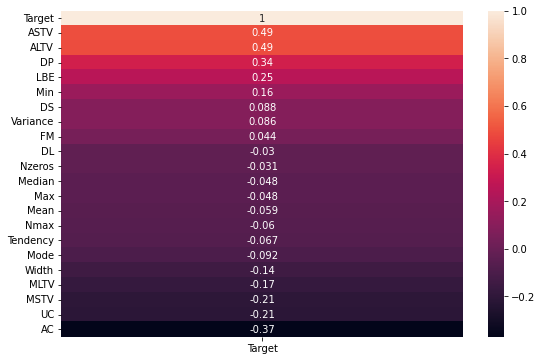

In [ ]:
#@title
#Observamos el nivel de correlacion de todas las variables independientes con respectos 'price' la dependiente
plt.figure(figsize = (9,6))
sns.heatmap(df.corr()[['Target']].sort_values(by='Target', ascending=False), annot = True)
plt.show()

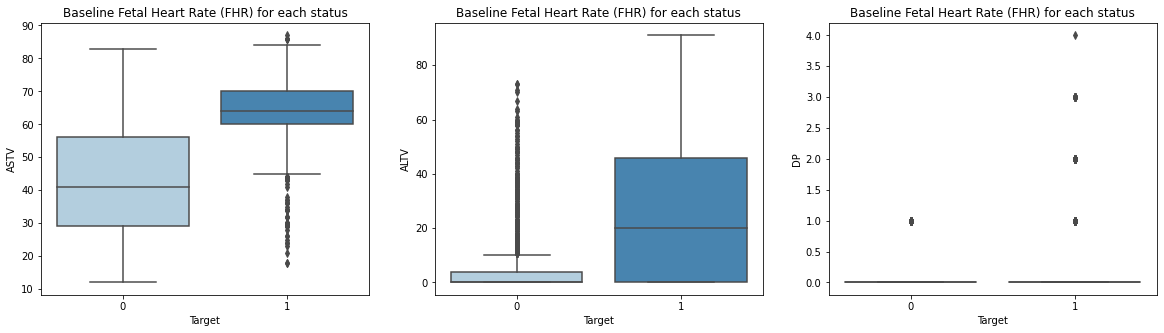

In [ ]:
# 3 - RELACION UNIVARIANTE DEL TARGET CON LAS VARIABLES EXPLICATIVAS MAS SIGNIFICATIVAS
f = plt.figure(figsize = (20,5))
ax = f.add_subplot(131)
sns.boxplot(x = 'Target', y= 'ASTV', data = df, palette="Blues", ax=ax)
ax.set_title('Baseline Fetal Heart Rate (FHR) for each status')

ax = f.add_subplot(132)
sns.boxplot(x = 'Target', y= 'ALTV', data = df, palette="Blues", ax=ax)
ax.set_title('Baseline Fetal Heart Rate (FHR) for each status')

ax = f.add_subplot(133)
sns.boxplot(x = 'Target', y= 'DP', data = df, palette="Blues", ax=ax)
ax.set_title('Baseline Fetal Heart Rate (FHR) for each status')

plt.show()


### **Fase de entrenamiento.**

**Muestreo**

In [ ]:
#selecionamos nuestra variable dependiente y las independientes
from sklearn.model_selection import train_test_split

X = df.drop("Target", axis = 1)
y = df["Target"]

Dividimos nuestro dataset indicando que el 40% sea utilizado para la parte de prueba, lo que nos deja un dataset del 60% para entrenar el modelo y guardado con la seed 0 para que no cambien los datos del muestreo.

In [ ]:
#Preparamos nuestro set de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 0)

Hemos creado un modelo NB Gaussiano debido a que la mayoria de nuestros datos son de tipo cuantitativas continuas, de esta manera ajustamos nuestro modelo con el conjunto de entrenamiento y realizamos prediciones probabilisticas continua indicando la predicion (_prob) esto hace que el output sea continuo entre 0 y 1 a diferencia que sean 1 y 0.

**Modelización GNB**

In [ ]:
#Importamos el modelo de la libreria sklearn
from sklearn.naive_bayes import GaussianNB

#Modelo GNB porque la mayorias de variables son de tipo continuas.
GNB = GaussianNB()

##Entrenamiento
modelNB = GNB.fit(X_train, y_train.values.ravel())

#Predicion de probablidad continua (_prob) de y_train con los datos usado en el entrenamiento
y_pred_train = modelNB.predict_proba(X_train)
#Predicion de probabilidad continua (_prob) de y_test con los datos de prueba
y_pred_test = modelNB.predict_proba(X_test)

### **Evaluación y análisis de los resultados.**

In [ ]:
#Importamos las metricas de validacion ROC_AUC_SCORE, ROC_CURVE y  AUC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [ ]:
# CURVA ROC Y AUC para Training
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

In [ ]:
# CURVA ROC Y AUC para Test
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

Observamos como el modelo se ajusta bien ya que con el set de prueba el cual contiene los datos que el modelo no habia visto, tambien nos arroja resultados muy parecido al set de entrenamiento con un area del 93% en comparacion con el entrenamiento de 95% por lo que su precision es muy buena a la hora de clasificar a un nuevo paciente.

**Gráfica**

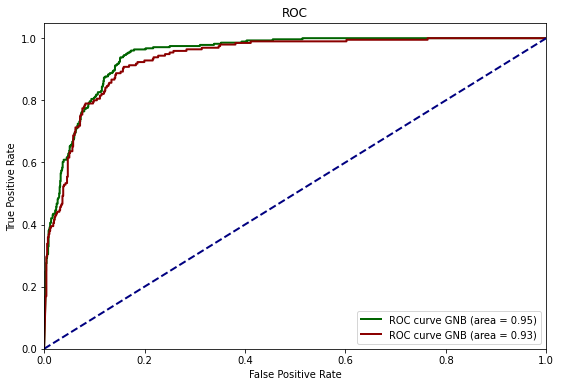

In [ ]:
#@title
plt.figure(figsize = (9,6))
lw = 2

plt.plot(fpr_train,tpr_train,color="darkgreen",lw=lw,label="ROC curve GNB (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test,tpr_test,color="darkred",lw=lw,label="ROC curve GNB (area = %0.2f)" % roc_auc_test,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()


**Modelización SVC**

Ya hemos realizado el Split de los datos por lo que ajustamos el modelo SVM.SVC con los paremetros por defecto C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

In [ ]:
#Importamos el modelo de la libreria sklearn
from sklearn.svm import SVC

#Modelo SVC de la familia SVM para clasificacion solo con el cambio del parametro Prob a True para calculo binario.
#este cambio es necesario para utilizar predict_prob.
SV = SVC( probability = True)

##Entrenamiento
modelSVM = SV.fit(X_train, y_train)

#Predicion de probablidad continua (_prob) de y_train con los datos usado en el entrenamiento
y_pred_train_sv = modelSVM.predict_proba(X_train)
#Predicion de probabilidad continua (_prob) de y_test con los datos de prueba
y_pred_test_sv = modelSVM.predict_proba(X_test)

### **Evaluación de los modelos y análisis de los resultados.**

In [ ]:
#Importamos la metrica de validacion Accuracy, ya la demas ROC y AUC estan cargadas.
from sklearn.metrics import accuracy_score

**2- Obtenga la curva ROC y el área bajo la curva para los conjuntos de entrenamiento y test.**

Codificamos los calculos para obtener la curva Roc y el area bajo de la curva.

In [ ]:
# CURVA ROC Y AUC para Training
fpr_train_sv, tpr_train_sv, _ = roc_curve(y_train, y_pred_train_sv[:, 1])
roc_auc_train_sv = auc(fpr_train_sv, tpr_train_sv)

In [ ]:
# CURVA ROC Y AUC para Test
fpr_test_sv, tpr_test_sv, _ = roc_curve(y_test, y_pred_test_sv[:, 1])
roc_auc_test_sv = auc(fpr_test_sv, tpr_test_sv)

#### **Gráficas Naive Bayes Vs Super Vector Machine Classification**

Graficamos en un mismo plano los resultados de los dos modelos, donde observamos que ambos modelos se ajustan bien, sin embargo el GBN tiene un mejor ajuste y precision a este conjunto de datos por lo que este primer paso indica cual modelo selecionar para optimizar, no obtante en este caso entiendo que cualquiera de los dos seria una buena selecion, solo quedaria optimizar los hiperparametros, esto lo veremos para el proyecto final.

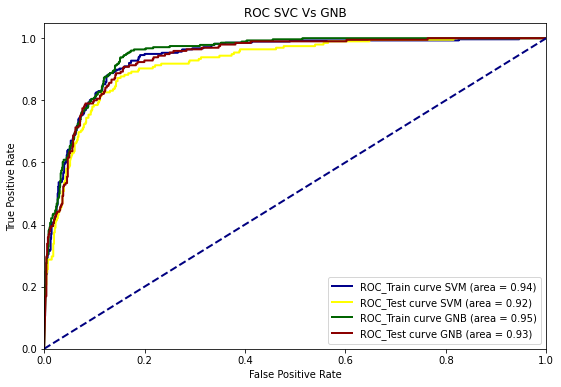

In [ ]:
#@title
plt.figure(figsize = (9,6))
lw = 2

plt.plot(fpr_train_sv,tpr_train_sv,color="darkblue",lw=lw,label="ROC_Train curve SVM (area = %0.2f)" % roc_auc_train_sv,)
plt.plot(fpr_test_sv,tpr_test_sv,color="yellow",lw=lw,label="ROC_Test curve SVM (area = %0.2f)" % roc_auc_test_sv,)
plt.plot(fpr_train,tpr_train,color="darkgreen",lw=lw,label="ROC_Train curve GNB (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test,tpr_test,color="darkred",lw=lw,label="ROC_Test curve GNB (area = %0.2f)" % roc_auc_test,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC SVC Vs GNB")
plt.legend(loc="lower right")
plt.show()

####**Accuracy Score**

In [ ]:
#@title
#SVM Accuracy
accuracy_sv1= accuracy_score(y_true = y_train,y_pred = modelSVM.predict(X_train)  ,normalize = True)
print(f"El accuracy de training SVM es: {100*accuracy_sv1:.2f}%")

accuracy_sv2 = accuracy_score(y_true = y_test,y_pred = modelSVM.predict(X_test) ,normalize = True)
print(f"El accuracy de test SVM es: {100*accuracy_sv2:.2f}%")

El accuracy de training SVM es: 87.61%
El accuracy de test SVM es: 86.02%


In [ ]:
#@title
#GBN Accuracy
accuracy_GBN1= accuracy_score(y_true = y_train, y_pred = modelNB.predict(X_train)  ,normalize = True)
print(f"El accuracy de training GNB es: {100*accuracy_GBN1:.2f}%")

accuracy_GBN2 = accuracy_score(y_true = y_test, y_pred = modelNB.predict(X_test) ,normalize = True)
print(f"El accuracy de test GNB es: {100*accuracy_GBN2:.2f}%")

El accuracy de training GNB es: 88.71%
El accuracy de test GNB es: 88.48%


###**FASE FINAL**
#### **Seleccion y Optimizcon de modelo SVM**

Luego de comparar los dos modelos GNB y SVC con sus parametros por defecto, escogemos el modelo SVC para optimzarlo y obtener la mejor optimacion posible.

In [ ]:
#selecionamos nuestra variable dependiente y las independientes
from sklearn.model_selection import train_test_split

X = df.drop("Target", axis = 1)
y = df["Target"]

In [ ]:
#Importamos la tecnica a utilizar para escalar la variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Pasamos la serie a un array de numpy ya que esta tecnica esta optimizada para trabajar con matrices
y = scaler.fit_transform(y.to_numpy().reshape(-1,1))

#Luego de escalar, volvemos a convertir el array  a su dimension original en 1xn
y = y.reshape(1,-1)[0]

In [ ]:
#Preparamos nuestro set de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y.astype(int), test_size = 0.40, random_state = 0)

In [ ]:
#Importamos la libreria a utilizr para la optimizacion del modelo con los mejores parametros
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hiperparametros
#Creamos una lista de diccionarios para guardar los parametros de cada configuracion del modelo a utilizar para seleccionarlos que mejor se adecuen.
param_grid = [
    {"kernel": ["rbf"], "gamma": np.logspace(-9, 3, 13), "C": [0.001,0.01,0.02,0.03, 0.1, 1,2,3,4,5,6,7,8,9,10]},
    {"kernel": ["linear"], "C": [0.001,0.01,0.02,0.03, 0.1, 1,2,3,4,5,6,7,8,9,10]},
    {"kernel": ["poly"], "C": [0.001,0.01,0.02,0.03, 0.1, 1,2,3,4,5,6,7,8,9,10], "degree": [2,3]},]

In [ ]:
#Configuramos la regilla con los diferentes Kernel e hiperparametros con una validacion cruzada de 5 ciclos para obtener los mejores hiperparametros a traves del area de la curva.
grid = GridSearchCV(
        estimator  = SVC(),
        param_grid = param_grid,
        scoring    = 'roc_auc',
        n_jobs     = -1,
        cv         = 5,
        verbose    = 0,
        return_train_score = True
      )

In [ ]:
# Se asigna el resultado para que no se imprima por pantalla
grid.fit(X = X_train, y = y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.02, 0.03, 0.1, 1, 2, 3, 4, 5, 6,
                                7, 8, 9, 10],
                          'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.02, 0.03, 0.1, 1, 2, 3, 4, 5, 6,
                                7, 8, 9, 10],
                          'kernel': ['linear']},
                         {'C': [0.001, 0.01, 0.02, 0.03, 0.1, 1, 2, 3, 4, 5, 6,
                                7, 8, 9, 10],
                          'degree': [2, 3], 'kernel': ['poly']}],
             return_train_score=True, scoring='roc_auc')

In [ ]:
# Resultados del grid
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_C,param_gamma,param_kernel,param_degree,mean_test_score,std_test_score,mean_train_score,std_train_score
174,9,0.0001,rbf,NaN,0.966246,0.009178,0.981891,0.000912
187,10,0.0001,rbf,NaN,0.966194,0.009026,0.982547,0.001050
161,8,0.0001,rbf,NaN,0.965646,0.009618,0.981058,0.000960
148,7,0.0001,rbf,NaN,0.965356,0.010356,0.980361,0.001000
203,4,NaN,linear,NaN,0.964767,0.012448,0.971153,0.002084
135,6,0.0001,rbf,NaN,0.964755,0.011533,0.979236,0.001108
202,3,NaN,linear,NaN,0.964474,0.012954,0.971111,0.002021
122,5,0.0001,rbf,NaN,0.964391,0.012026,0.977623,0.001227
204,5,NaN,linear,NaN,0.964113,0.012281,0.971105,0.002046
201,2,NaN,linear,NaN,0.964055,0.013824,0.971048,0.001973


In [ ]:
# print best parameter luego de optimizar
print(grid.best_params_)

# print como se ve  nuestro modelo con los mejores hperparametros
print(grid.best_estimator_)

{'C': 9, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=9, gamma=0.0001)


In [ ]:
#Modelo SVC de la familia SVM para clasificacion Optimizado con los hiperparametros que nos arrojo la regilla como la mejor configuracion ya nuevamente entrenamos el modelo y lo comparamos con el anterior.
SV_tuning = SVC( C=9, gamma= 0.0001, probability = True)

##Entrenamiento
modelSVM_tuning = SV_tuning.fit(X_train, y_train)

#Predicion de probablidad continua (_prob) de y_train con los datos usado en el entrenamiento
y_pred_train_sv1 = modelSVM_tuning.predict_proba(X_train)
#Predicion de probabilidad continua (_prob) de y_test con los datos de prueba
y_pred_test_sv1 = modelSVM_tuning.predict_proba(X_test)

In [ ]:
# CURVA ROC Y AUC para Training
fpr_train_sv1, tpr_train_sv1, _ = roc_curve(y_train, y_pred_train_sv1[:, 1])
roc_auc_train_sv1 = auc(fpr_train_sv1, tpr_train_sv1)

In [ ]:
# CURVA ROC Y AUC para Test
fpr_test_sv1, tpr_test_sv1, _ = roc_curve(y_test, y_pred_test_sv1[:, 1])
roc_auc_test_sv1 = auc(fpr_test_sv1, tpr_test_sv1)

Observamos la comparacion de los dos modelos SVC y SVC1 el cual es el optimizado, y podemos ver que el mismo mejoro bastante en comparacion al primer modelo sin optimizar.

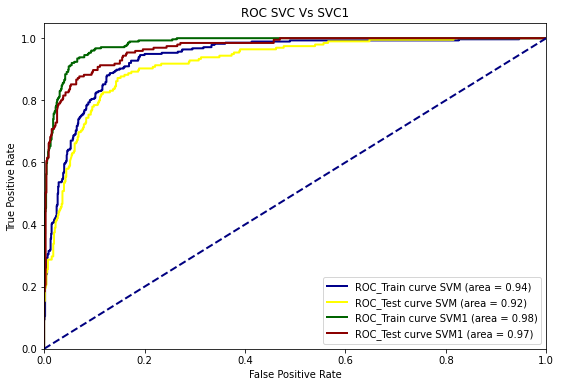

In [ ]:
#@title
plt.figure(figsize = (9,6))
lw = 2

plt.plot(fpr_train_sv,tpr_train_sv,color="darkblue",lw=lw,label="ROC_Train curve SVM (area = %0.2f)" % roc_auc_train_sv,)
plt.plot(fpr_test_sv,tpr_test_sv,color="yellow",lw=lw,label="ROC_Test curve SVM (area = %0.2f)" % roc_auc_test_sv,)
plt.plot(fpr_train_sv1,tpr_train_sv1,color="darkgreen",lw=lw,label="ROC_Train curve SVM1 (area = %0.2f)" % roc_auc_train_sv1,)
plt.plot(fpr_test_sv1,tpr_test_sv1,color="darkred",lw=lw,label="ROC_Test curve SVM1 (area = %0.2f)" % roc_auc_test_sv1,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC SVC Vs SVC1")
plt.legend(loc="lower right")
plt.show()

####**Accuracy Score SVC Vs SVC1**

In [ ]:
#@title
#SVM Accuracy
accuracy_sv1= accuracy_score(y_true = y_train,y_pred = modelSVM.predict(X_train)  ,normalize = True)
print(f"El accuracy de training SVM es: {100*accuracy_sv1:.2f}%")

accuracy_sv2 = accuracy_score(y_true = y_test,y_pred = modelSVM.predict(X_test) ,normalize = True)
print(f"El accuracy de test SVM es: {100*accuracy_sv2:.2f}%")

confusion_matrix = pd.crosstab(
    y_test,
     modelSVM.predict(X_test),
    rownames=['Real'],
    colnames=['Predicción']
)
print(confusion_matrix)

print(" ")

#SVM Accuracy
accuracy_sv3= accuracy_score(y_true = y_train,y_pred = modelSVM_tuning.predict(X_train)  ,normalize = True)
print(f"El accuracy de training SVM1 es: {100*accuracy_sv3:.2f}%")

accuracy_sv4 = accuracy_score(y_true = y_test,y_pred = modelSVM_tuning.predict(X_test) ,normalize = True)
print(f"El accuracy de test SVM1 es: {100*accuracy_sv4:.2f}%")

confusion_matrix = pd.crosstab(
    y_test,
     modelSVM_tuning.predict(X_test),
    rownames=['Real'],
    colnames=['Predicción']
)
print(confusion_matrix)

El accuracy de training SVM es: 87.61%
El accuracy de test SVM es: 86.02%
Predicción    0    1
Real                
0           630   26
1            93  102
 
El accuracy de training SVM1 es: 93.49%
El accuracy de test SVM1 es: 92.71%
Predicción    0    1
Real                
0           639   17
1            45  150
